# Task 3 - Experience Analytics

In [1]:
# Import Libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
%matplotlib inline
#display-related options
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)

## Import Data

In [3]:
CSV_PATH = "../data/raw/rawData.csv"

In [4]:
# taking a csv file path and reading a dataframe

def read_raw_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [5]:
xDR_df = read_raw_data(CSV_PATH)

file read as csv


In [6]:
xDR_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1.824e+06,2.082e+14,3.366e+10,3.552e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.824e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1.546e+06,24420.0,1.634e+06,1.271e+06,3.564e+06,137762.0,1.585e+07,2.501e+06,8.199e+06,9.656e+06,2.781e+08,1.434e+07,1.717e+08,8.814e+06,3.675e+07,3.089e+08
1,1.311e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1.365e+06,2.082e+14,3.368e+10,3.579e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1.926e+06,7165.0,3.494e+06,9.202e+05,6.290e+05,308339.0,2.025e+07,1.911e+07,1.834e+07,1.723e+07,6.088e+08,1.171e+06,5.269e+08,1.506e+07,5.380e+07,6.534e+08
2,1.311e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1.362e+06,2.082e+14,3.376e+10,3.528e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.362e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1.684e+06,42224.0,8.535e+06,1.694e+06,2.690e+06,672973.0,1.973e+07,1.470e+07,1.759e+07,6.163e+06,2.296e+08,3.956e+05,4.107e+08,4.216e+06,2.788e+07,2.798e+08
3,1.311e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1.322e+06,2.082e+14,3.375e+10,3.536e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.322e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,6.441e+05,13372.0,9.024e+06,2.788e+06,1.440e+06,631229.0,2.139e+07,1.515e+07,1.399e+07,1.098e+06,7.995e+08,1.085e+07,7.490e+08,1.280e+07,4.332e+07,8.460e+08
4,1.311e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1.089e+06,2.082e+14,3.370e+10,3.541e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,8.626e+05,50188.0,6.248e+06,1.501e+06,1.936e+06,173853.0,1.526e+07,1.896e+07,1.712e+07,4.152e+05,5.277e+08,3.530e+06,5.507e+08,1.391e+07,3.854e+07,5.691e+08


In [7]:
experience_df = xDR_df[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
           'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',            
           'Handset Type']].copy()

In [8]:
experience_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366e+10,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368e+10,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376e+10,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375e+10,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined
4,3.370e+10,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
    ●	Average TCP retransmission
    ●	Average RTT
    ●	Handset type
    ●	Average throughput


#### Lets handle the missing values

<AxesSubplot:>

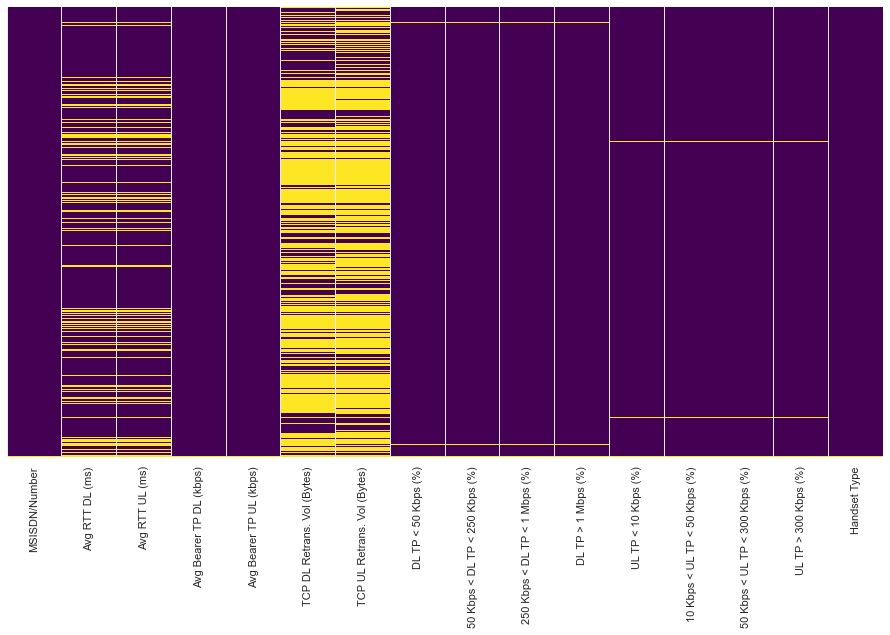

In [9]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(experience_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
def percent_missing(df):

    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    return round((totalMissing / totalCells) * 100, 2)

In [11]:
print("this data frame contains", percent_missing(experience_df), "%", "missing values.")

this data frame contains 10.34 % missing values.


In [12]:
experience_df['MSISDN/Number'] = experience_df['MSISDN/Number'].fillna(method='ffill')

In [13]:
experience_df['Handset Type'] = experience_df['Handset Type'].fillna(method='ffill')

In [14]:
experience_df.fillna(experience_df.mean(), inplace=True)

In [15]:
print("this data frame contains", percent_missing(experience_df), "%", "missing values.")

this data frame contains 0.0 % missing values.


### Lets handle outliners 

#### check outliners

<AxesSubplot:xlabel='DL TP > 1 Mbps (%)'>

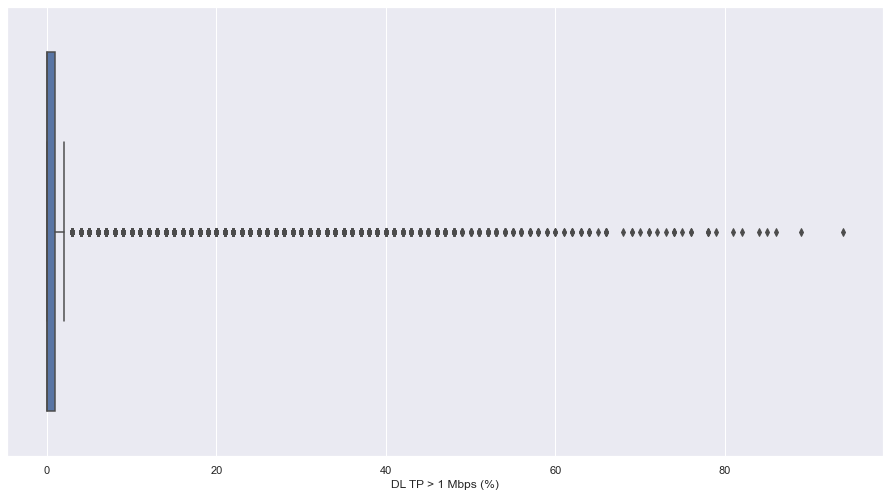

In [16]:
sns.boxplot(x=experience_df['DL TP > 1 Mbps (%)'],data=experience_df)

In [17]:
def outlier(df):
    column_name=['Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].mean(),np.where(df[i]<lower_quartile,df[i].mean(),df[i]))
    return df

In [18]:
experience_r_df=outlier(experience_df)

In [19]:
experience_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MSISDN/Number                   150001 non-null  float64
 1   Avg RTT DL (ms)                 150001 non-null  float64
 2   Avg RTT UL (ms)                 150001 non-null  float64
 3   Avg Bearer TP DL (kbps)         150001 non-null  float64
 4   Avg Bearer TP UL (kbps)         150001 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)     150001 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)     150001 non-null  float64
 7   DL TP < 50 Kbps (%)             150001 non-null  float64
 8   50 Kbps < DL TP < 250 Kbps (%)  150001 non-null  float64
 9   250 Kbps < DL TP < 1 Mbps (%)   150001 non-null  float64
 10  DL TP > 1 Mbps (%)              150001 non-null  float64
 11  UL TP < 10 Kbps (%)             150001 non-null  float64
 12  10 Kbps < UL TP 

#### Check for outliners

<AxesSubplot:xlabel='DL TP > 1 Mbps (%)'>

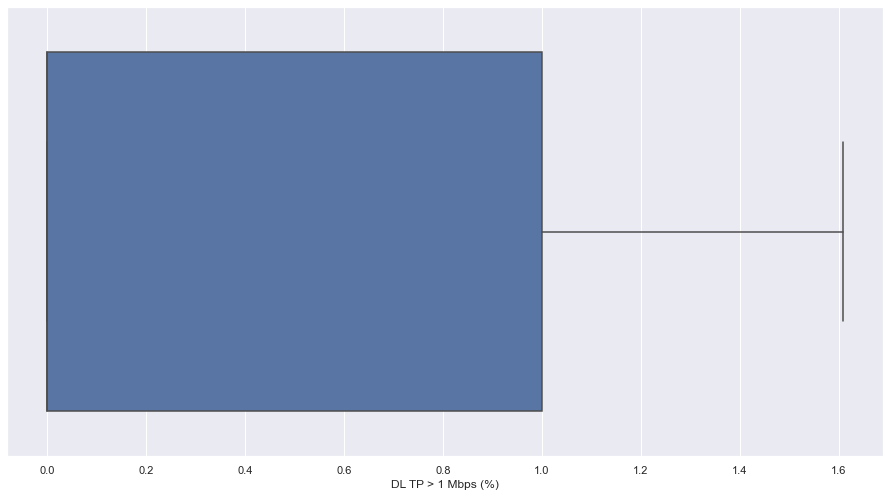

In [20]:
sns.boxplot(x=experience_df['DL TP > 1 Mbps (%)'],data=experience_df)

In [28]:
#Calculate total TCP,RTT and Throughput
experience_r_df["Total TCP"]=experience_r_df['TCP DL Retrans. Vol (Bytes)']+ experience_r_df['TCP UL Retrans. Vol (Bytes)']+experience_r_df['TCP DL Retrans. Vol (Bytes)']+ experience_r_df['TCP UL Retrans. Vol (Bytes)']
experience_r_df["Total RTT"]=experience_r_df['Avg RTT DL (ms)']+experience_r_df['Avg RTT UL (ms)']
experience_r_df["Total Throughput"]=experience_r_df['DL TP < 50 Kbps (%)']+experience_r_df['50 Kbps < DL TP < 250 Kbps (%)']+experience_r_df['250 Kbps < DL TP < 1 Mbps (%)']+experience_r_df['DL TP > 1 Mbps (%)']+experience_r_df['UL TP < 10 Kbps (%)']+experience_r_df['10 Kbps < UL TP < 50 Kbps (%)']+experience_r_df['50 Kbps < UL TP < 300 Kbps (%)']+experience_r_df['UL TP > 300 Kbps (%)']

In [29]:
experience_agg_by_customer = experience_r_df.groupby('MSISDN/Number').agg({'Total TCP': 'sum',
                                                                          'Total RTT': 'sum',
                                                                          'Total Throughput': 'sum', 
                                                                           'Handset Type': lambda x: x.mode()[0]})

In [30]:
experience_agg_by_customer.head()

,Total TCP,Total RTT,Total Throughput,Handset Type
MSISDN/Number,,,,
3.360e+10,4.314e+07,63.663,200.000,Huawei P20 Lite Huawei Nova 3E
3.360e+10,4.314e+07,127.459,200.000,Apple iPhone 7 (A1778)
3.360e+10,4.314e+07,127.459,200.000,undefined
3.360e+10,4.314e+07,84.000,200.000,Apple iPhone 5S (A1457)
3.360e+10,8.245e+07,218.459,398.548,Apple iPhone Se (A1723)


### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
    a.	TCP values in the dataset. 
    b.	RTT values in the dataset.
    c.	Throughput values in the dataset.


#### a.    TCP values in the dataset. 

In [31]:
tcp_trans = experience_agg_by_customer.sort_values(by=['Total TCP'], ascending=False)

top_10_tcp = tcp_trans.head(10)
bot_10_tcp = tcp_trans.tail(10)
most_tcp_frq = tcp_trans['Total TCP'].value_counts().head(10)

In [32]:
top_10_tcp[['Total TCP']]

,Total TCP
MSISDN/Number,
3.363e+10,7.765e+08
3.361e+10,7.334e+08
3.363e+10,7.334e+08
3.366e+10,6.902e+08
3.376e+10,6.393e+08
3.368e+10,6.197e+08
3.367e+10,5.570e+08
3.379e+10,5.177e+08
3.363e+10,5.177e+08


In [33]:
bot_10_tcp[['Total TCP']]

,Total TCP
MSISDN/Number,
3.365e+10,3.922e+07
3.361e+10,3.922e+07
3.365e+10,3.922e+07
3.366e+10,3.922e+07
3.368e+10,3.922e+07
3.365e+10,3.922e+07
3.368e+10,3.922e+07
3.365e+10,3.922e+07
3.368e+10,3.922e+07


In [34]:
most_tcp_frq

4.314e+07    46854
4.314e+07    12579
8.628e+07     7490
4.314e+07     5672
8.628e+07     4677
3.931e+07     4566
3.922e+07     3071
4.304e+07     2365
8.628e+07     2210
4.314e+07     1671
Name: Total TCP, dtype: int64

### b.    RTT values in the dataset.

In [36]:
tcp_rtt = experience_agg_by_customer.sort_values(by=['Total RTT'], ascending=False)

top_10_rtt = tcp_rtt.head(10)
bot_10_rtt = tcp_rtt.tail(10)
most_rtt_frq = tcp_rtt['Total RTT'].value_counts().head(10)

In [37]:
top_10_rtt[['Total RTT']]

,Total RTT
MSISDN/Number,
3.363e+10,2210.277
3.361e+10,2023.697
3.363e+10,1879.780
3.376e+10,1815.432
3.379e+10,1513.177
3.367e+10,1469.382
3.367e+10,1321.404
3.366e+10,1257.077
3.363e+10,1245.403


In [38]:
bot_10_rtt[['Total RTT']]

,Total RTT
MSISDN/Number,
3.376e+10,38.0
3.362e+10,38.0
3.367e+10,38.0
3.363e+10,38.0
3.366e+10,38.0
3.368e+10,38.0
3.363e+10,38.0
3.362e+10,38.0
3.376e+10,38.0


In [39]:
most_rtt_frq

127.459    16272
127.459    14662
114.796     2961
112.796     2190
113.796     2130
254.917     1928
115.796     1714
254.917     1334
116.796     1029
55.663       820
Name: Total RTT, dtype: int64

### c.    Throughput values in the dataset.

In [40]:
tcp_throuput = experience_agg_by_customer.sort_values(by=['Total Throughput'], ascending=False)

top_10_throuput = tcp_throuput.head(10)
bot_10_throuput = tcp_throuput.tail(10)
most_rtt_throuput = tcp_throuput['Total Throughput'].value_counts().head(10)

In [41]:
top_10_throuput[['Total Throughput']]

,Total Throughput
MSISDN/Number,
3.363e+10,3573.983
3.363e+10,3375.530
3.361e+10,3364.821
3.366e+10,3172.722
3.376e+10,2985.938
3.368e+10,2976.010
3.367e+10,2572.451
3.379e+10,2388.937
3.376e+10,2386.290


In [42]:
bot_10_throuput[['Total Throughput']]

,Total Throughput
MSISDN/Number,
3.367e+10,192.917
3.365e+10,192.717
3.367e+10,192.610
3.370e+10,192.610
3.362e+10,192.610
3.366e+10,192.599
3.367e+10,192.140
3.366e+10,192.065
3.367e+10,191.917


In [43]:
most_rtt_throuput

200.000    47450
400.000     7146
198.548     5104
199.000     3069
198.000     2802
398.548     2594
198.241     1993
197.000     1901
196.631     1069
197.631     1006
Name: Total Throughput, dtype: int64

### Task 3.3 - Compute & report:
    d.	The distribution of the average throughput  per handset type and provide interpretation for your findings.
    e.	The average TCP retransmission view per handset type and provide interpretation for your findings.


In [44]:
handset_type_df = experience_agg_by_customer.groupby('Handset Type').agg(
    {'Total Throughput': 'mean', 'Total RTT': 'mean'})
handset_type_df.head()

,Total Throughput,Total RTT
Handset Type,,
A-Link Telecom I. Cubot A5,197.454,57.663
A-Link Telecom I. Cubot Note Plus,198.717,117.796
A-Link Telecom I. Cubot Note S,198.241,113.796
A-Link Telecom I. Cubot Nova,198.548,44.000
A-Link Telecom I. Cubot Power,198.241,43.000


In [45]:
sorted_by_tp = handset_type_df.sort_values(
    'Total Throughput', ascending=False)
top_tp = sorted_by_tp['Total Throughput']

In [46]:
top_tp.head()

Handset Type
Huawei Me909S-120                           698.920
Huawei B618S-22D                            663.039
Apple iPhone Xr (A2106)                     598.500
Huawei Evr-Al00                             598.000
D-Link Corporati. D-Link Lte Usb Adaptor    597.988
Name: Total Throughput, dtype: float64

In [58]:
sorted_by_tcp = handset_type_df.sort_values(
    'Total RTT', ascending=False)
top_tcp = sorted_by_tcp['Total RTT']

In [59]:
top_tcp.head()

Handset Type
Huawei Me909S-120                 425.876
Huawei B618S-22D                  409.890
Huawei Evr-Al00                   309.580
Tp-Link Technolo. Archer Mr200    287.266
Apple iPhone Xr (A2106)           259.453
Name: Total RTT, dtype: float64

### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. 

In [70]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [71]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

In [72]:
metrics = experience_agg_by_customer[[ 'Total TCP','Total RTT', 'Total Throughput']]
normalized_metrics = scale_and_normalize(metrics, [ 'Total TCP','Total RTT', 'Total Throughput'])
normalized_metrics.describe()

,Total TCP,Total RTT,Total Throughput
count,106856.000,106856.000,106856.000
mean,0.331,0.828,0.239
std,0.237,0.213,0.216
min,0.000,0.000,0.000
25%,0.128,0.694,0.062
50%,0.234,0.963,0.116
75%,0.549,0.990,0.462
max,0.988,1.000,1.000


In [78]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

experience_metrics_with_cluster = experience_agg_by_customer.copy()
experience_metrics_with_cluster['clusters'] = pred
experience_metrics_with_cluster['clusters'].value_counts()

0    59601
1    23684
2    23571
Name: clusters, dtype: int64

In [79]:
experience_metrics_with_cluster = experience_metrics_with_cluster.rename(columns={'Total TCP': 'Total_TCP', 'Total RTT': 'Total_RTT','Total Throughput':'Total_Throughput'})

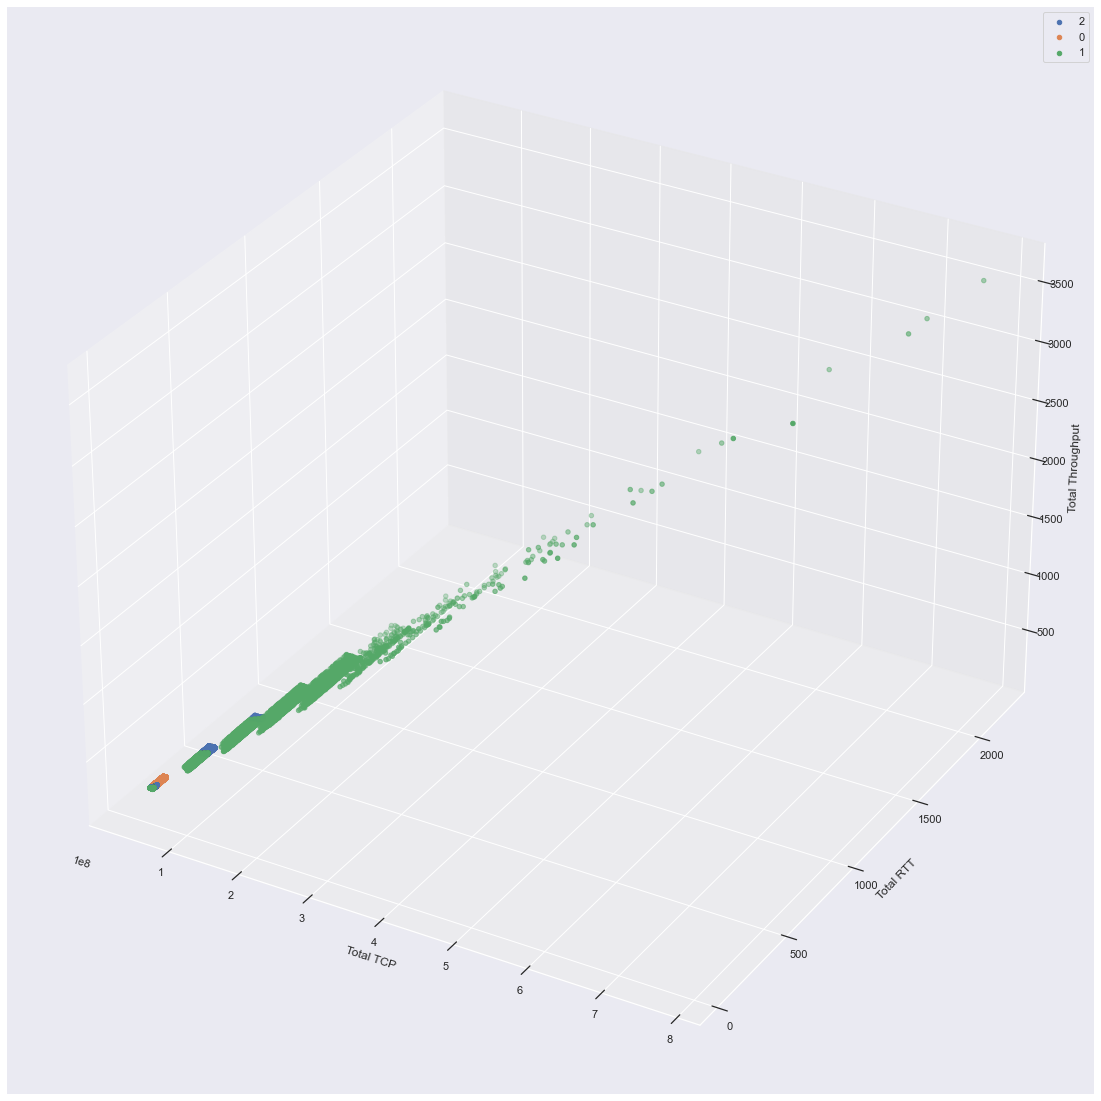

In [82]:
from matplotlib import cm
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
for s in experience_metrics_with_cluster.clusters.unique():
    ax.scatter(experience_metrics_with_cluster.Total_TCP[experience_metrics_with_cluster.clusters==s],experience_metrics_with_cluster.Total_RTT[experience_metrics_with_cluster.clusters==s],experience_metrics_with_cluster.Total_Throughput[experience_metrics_with_cluster.clusters==s],label=s)
    ax.set_xlabel('Total TCP')
    ax.set_ylabel('Total RTT')
    ax.set_zlabel('Total Throughput')
    ax.legend()